In [5]:
import mdtraj as md
import numpy as np
import itertools
import deeptime
from deeptime.decomposition import TICA
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [48]:
## tica = np.load("pickle_files/tica/08-07-24_Test_tica_values.pkl.npy", mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

file = open('pickle_files/tica/tica_object.pkl','rb')
tica_object = pickle.load(file)
file.close()

new1 = md.load('direct_pdbs/just_trajectory_change/09-07-2024/label_2826_frame.pdb')

def compute_distance(traj):   # Creating the function to compute distances
    topology = traj.top       # topology of the trajetory
    # Differentiate heavy atoms from the light atoms
    heavy_atoms = [atom.index for atom in topology.atoms if atom.element.symbol != 'H']  # selecting atoms except the Hydrogen because all are heavy atoms except H
    pairs = list(itertools.product(heavy_atoms,heavy_atoms))   # Forming Pairs of atom, one atom can pair with all the other atom
    # Now the above pair has element that repeated and paird by itself. So to eliminate those loops are created below
    # this loop help to remove the atom and itself pairs
    for j in pairs:
        if j[0] == j[1]:
            pairs.remove(j)
    # this loop helps in eliminating repeated pairs
    filter_pair = []
    for i in pairs:
        if tuple(reversed(i)) not in filter_pair:
            filter_pair.append(i)
    # Now mdtraj computed the distances between atoms
    distances = md.compute_distances(traj,filter_pair)
    return distances

new2 = compute_distance(new1)

projection1 = [tica_object.transform(x) for x in tqdm(new2)]

pro1 = np.array(projection1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


In [7]:
file = open('pickle_files/tica/tica_object.pkl','rb')
tica_object = pickle.load(file)
file.close()

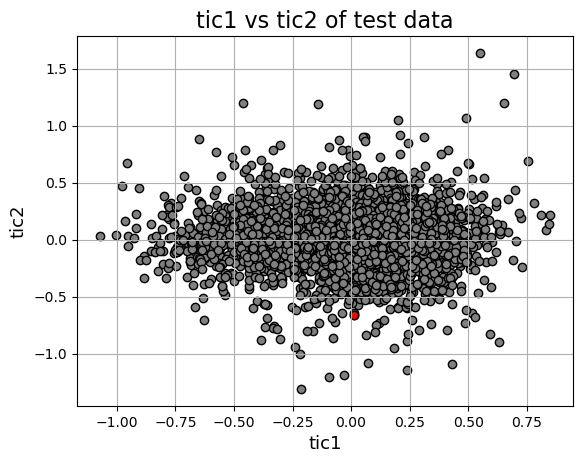

In [54]:
plt.subplot(1, 1, 1)
plt.scatter(tica[:,0], tica[:,1], color='gray', edgecolor='black')
plt.scatter(pro1[:,0], pro1[:,1], color='red', edgecolor='black')
        #plt.xlim(np.min(preturbed_projection[:,0]), np.max(preturbed_projection[:,0]))
        #plt.ylim(np.min(preturbed_projection[:,1]), np.max(preturbed_projection[:,1]))
plt.grid(True)
#plt.title(f'Sampled Data -Round{self.round_no}')
plt.xlabel('tic1',fontsize = 13)
plt.ylabel('tic2', fontsize = 13)
plt.title('tic1 vs tic2 of test data', fontsize = 16)
#plt.savefig('CNN_PLOTS/tic1 vs tic 2 plot CNN.png',dpi = 400)
plt.show()

In [21]:
tica.shape
new = [i for i in range(tica.shape[0])]

In [23]:
import plotly.express as px

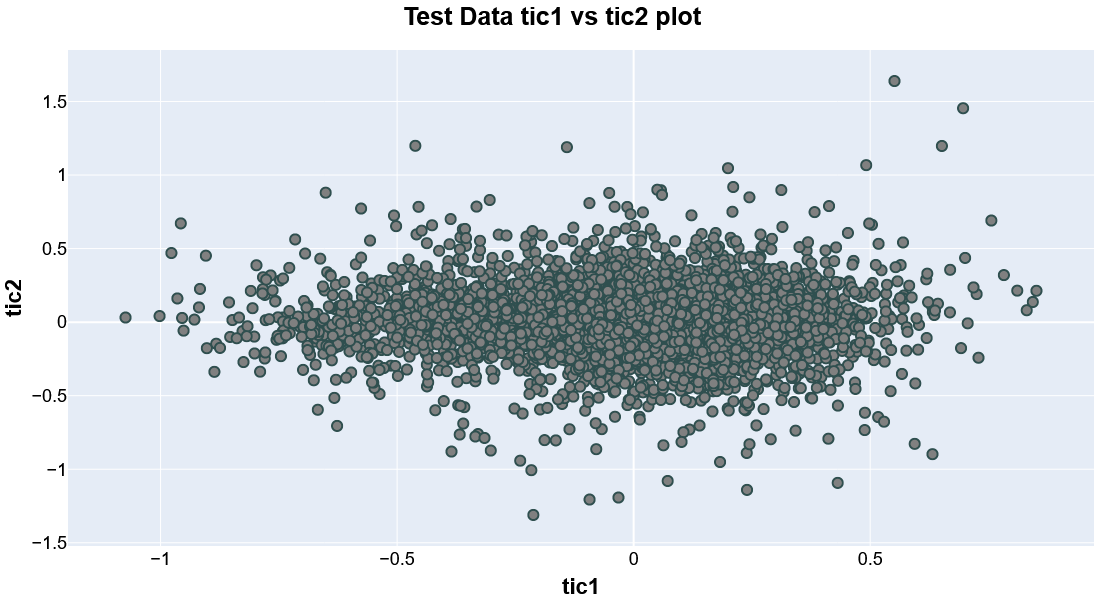

In [25]:
fig = px.scatter(x = tica[:,0],
                y = tica[:, 1],
                height = 600,
                width=700,
                 hover_data=[new]).update_layout(xaxis_title = '<b> tic1 </b>',yaxis_title = '<b> tic2 </b>',font = dict(family="Arial,sans-serif",size = 18, color = "black"),title = '<b> Test Data tic1 vs tic2 plot </b>', title_x = 0.5)

                #hover_data=[new]).update_layout(xaxis_title = '<b> tic1 </b>',yaxis_title = '<b> tic2 </b>',font = dict(family="Arial,sans-serif ",size=18, color="black"), title = '<b> Test Data tic1 vs tic2 plot </b>', title_x = 0.5)
fig.update_traces(marker = dict(size = 10,color='grey', line=dict(width=2, color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.update_layout(margin=dict(l=0, r=10, t=50, b=0))